In [105]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

start_year = 2016
start_month = 7
current_age = 32
retirement_age = 65
starting_funds = 42000
contributions = 500
contribution_freq_per_year = 12 # quarterly = 3, bi-yearly = 2
compound_freq_per_year = 1 # 12 = monthly
fee_freq_per_year = 1

# rates in % (all assumed per year)
rate_of_return = 6
fee = 0.75
inflation = 2

years_to_invest = retirement_age - current_age
months_to_invest = years_to_invest * 12

months = [(l % 12) + 1 for l in range(start_month - 1, start_month - 1 + months_to_invest)]
years = []
year_sum = start_year
capital = []
capital_sum = starting_funds
fees = []
interest = []
inflations = []
for i, l in enumerate(months):
    
    if l % 12 == 1: 
        year_sum += 1
    years.append(year_sum)
    
    # contributions
    if not i % (12 / contribution_freq_per_year):
        capital_sum += contributions
    capital.append(capital_sum)
        
    # fees
    if not i % (12 / fee_freq_per_year):
        fees.append(-capital_sum * fee / (fee_freq_per_year * 100.0))
    else:
        fees.append(np.nan)
        
    # interest
    if not i % (12 / compound_freq_per_year):
        interest.append(capital_sum * rate_of_return / (compound_freq_per_year * 100.0))
    else:
        interest.append(np.nan)
        
    # inflation
    if not i % 12:
        inflations.append(-capital_sum * inflation / 100.0)
    else:
        inflations.append(np.nan)
        
    


df = pd.DataFrame(index=range(months_to_invest))
df['Months'] = months
df['Year'] = years
df['Contrib'] = [contributions if not l % (12 / contribution_freq_per_year) else np.nan for l in range(df.shape[0])]

df['Capital'] = capital
df['Fees'] = fees
df['Interest'] = interest
df['Inflation'] = inflations

df['Total value'] = df.Capital + df.Interest + df.Fees + df.Inflation
#df.fillna(0, inplace=True)

df.tail(20)

,Months,Year,Contrib,Capital,Fees,Interest,Inflation,Total value
376,11,2047,500,230500,NaN,NaN,NaN,NaN
377,12,2047,500,231000,NaN,NaN,NaN,NaN
378,1,2048,500,231500,NaN,NaN,NaN,NaN
379,2,2048,500,232000,NaN,NaN,NaN,NaN
380,3,2048,500,232500,NaN,NaN,NaN,NaN
381,4,2048,500,233000,NaN,NaN,NaN,NaN
382,5,2048,500,233500,NaN,NaN,NaN,NaN
383,6,2048,500,234000,NaN,NaN,NaN,NaN
384,7,2048,500,234500,-1758.75,14070,-4690,242121.25
385,8,2048,500,235000,NaN,NaN,NaN,NaN


Total fees: $34,278.75
Total inflation: $91,410.00
Total costs: $125,688.75
-------
Total contributions: $198,000.00
Total interest: $274,230.00
End worth $242,121.25


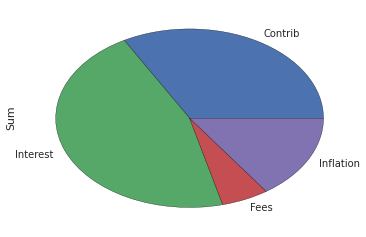

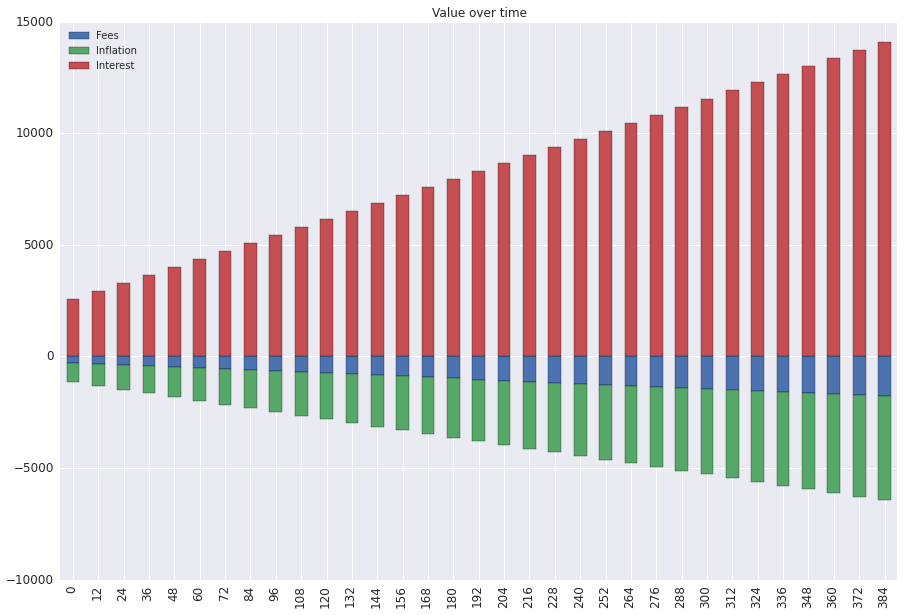

In [142]:
total_fees = df['Fees'].sum()
print 'Total fees: ${:,.2f}'.format(abs(total_fees))
total_inflation = df['Inflation'].sum()
print 'Total inflation: ${:,.2f}'.format(abs(total_inflation))
print 'Total costs: ${:,.2f}'.format(abs(total_fees) + abs(total_inflation))
print '-------'
total_contrib = df['Contrib'].sum()
print 'Total contributions: ${:,.2f}'.format(total_contrib)
total_earned = df['Interest'].sum()
print 'Total interest: ${:,.2f}'.format(total_earned)
worth = df.ix[::12,'Total value'].tolist()[-1]
print 'End worth ${:,.2f}'.format(worth)

tmp = pd.DataFrame(df.sum(axis=0), columns=['Sum']).abs()

tmp.loc[['Contrib','Interest','Fees','Inflation'],'Sum'].plot(kind='pie')

df.ix[::12,['Fees','Inflation','Interest']].plot(kind='bar', stacked=True,
                            title ="Value over time",
                            figsize=(15,10),
                            legend=True,
                            fontsize=12)